## About Netflix

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Objective

To Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### 1. Defining Problem Statement and Analysing basic metrics 

- *Need to analyze and process data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries*


**Show_id:** Unique ID for each Movie and TV show

**Type:** Identifier - A Movie or TV Show

**Title:** Title of the Movie / Tv Show

**Director:** Director of the Movie (null values observed in column)

**Cast:** Actors involved in the movie/show (null values observed in column)

**Country:** Country where the movie/show was produced (null values observed in column)

**Date_added:** Date it was added on Netflix (null values observed in column)

**Release_year:** Actual Release year of the movie/show

**Rating:** TV Rating of the movie/show

**Duration:** Total Duration - in minutes or number of seasons

**Listed_in:** Genre

**Description:** The summary description

 - Duration columns have data in minutes for movies and seasons for tv shows
 - NaN values needs to be imputed to get more accuracy in analysis

#### 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

**Observation and Attributes of Data**

In [9]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.shape 
# 8807 rows
# 12 columns

(8807, 12)

In [5]:
df.info()
# one column - release year is alone integer
# rest of the columns are as objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Missing value Detection

In [13]:
df.isnull().sum() # number of null values column-wise

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
# Conversion of column missing values to percentile of missing values column-wise
for column in df:
    counter = round((df[column].isnull().sum()/len(df)) * 100,3)
    print(column,"-----------",counter)

show_id ----------- 0.0
type ----------- 0.0
title ----------- 0.0
director ----------- 29.908
cast ----------- 9.368
country ----------- 9.436
date_added ----------- 0.114
release_year ----------- 0.0
rating ----------- 0.045
duration ----------- 0.034
listed_in ----------- 0.0
description ----------- 0.0


 - **Director columns seems to have the most number null values**

#### Statistical Summary

In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [62]:
df1 = df

In [64]:
# conversion of categorical attributes to 'category'
df1["date_added"] = pd.to_datetime(df1["date_added"])
df1 =df1.astype({"type" : "category", "rating" : "category"})
df1.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


#### 3. Non-Graphical Analysis: Value counts and unique attributes

In [44]:
# list of directors and their respective counts
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [42]:
# list of unique ratings
df['rating'].unique().tolist()

['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 nan,
 'TV-Y7-FV',
 'UR']

In [59]:
# countries value counts
df.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

 - **US has the most number of contents**
 - **After US, India has the second highest number of contents**

In [60]:
# Movie and TV show counts
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

 - **Total number of movies in netflix is 6131**
 - **Total number of TV shows in netflix is 2676**

In [61]:
# Rating and their counts
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

 - **last three values in the count belongs to duration columns**

In [448]:
# Moving duration in ratings to duration column
df.loc[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")]
df["duration"][[5541,5794,5813]] = df["rating"][[5541,5794,5813]]
df["rating"][[5541,5794,5813]] = "Nan"

In [449]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Nan            3
UR             3
Name: rating, dtype: int64

 - **After shifting respective data, ratings are displayed**

#### 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

### **Univariate Analysis**

In [69]:
df_dt = df1
df_dt['year_added'] = df1.date_added.dt.year
df_dt['month_added'] = df1.date_added.dt.month
df_dt['day_added'] = df1.date_added.dt.day_name()
df_dt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,Wednesday
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,Saturday


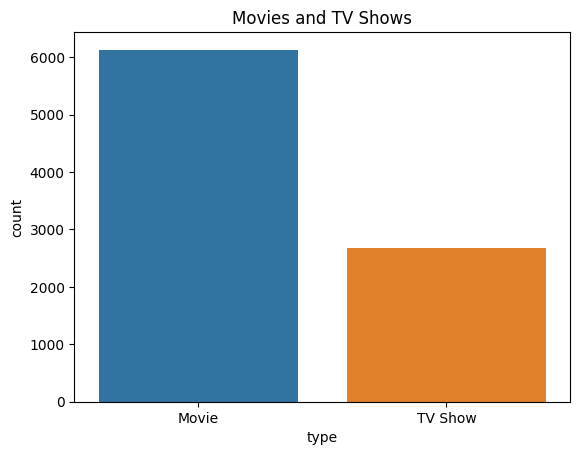

In [77]:
sns.countplot(x='type',data=df_dt)
plt.title('Movies and TV Shows')
plt.show()

 - **It is clearly showing a huge difference between number of movies and TV shows**

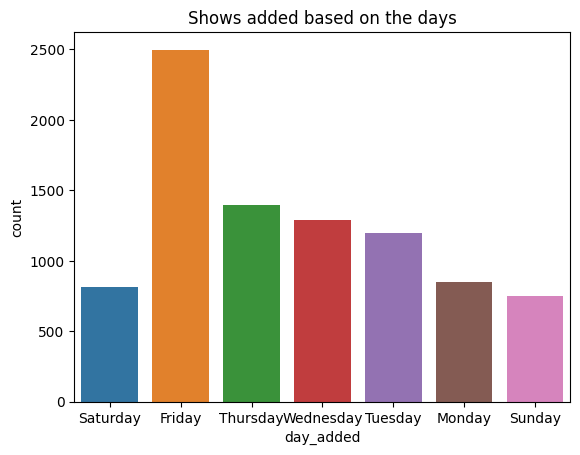

In [78]:
sns.countplot(x='day_added',data=df_dt)
plt.title('Shows added based on the days')
plt.show()

 - **Most number of contents are uploaded during Friday**
 - **Highest number of contents uploaded is almost 2500**

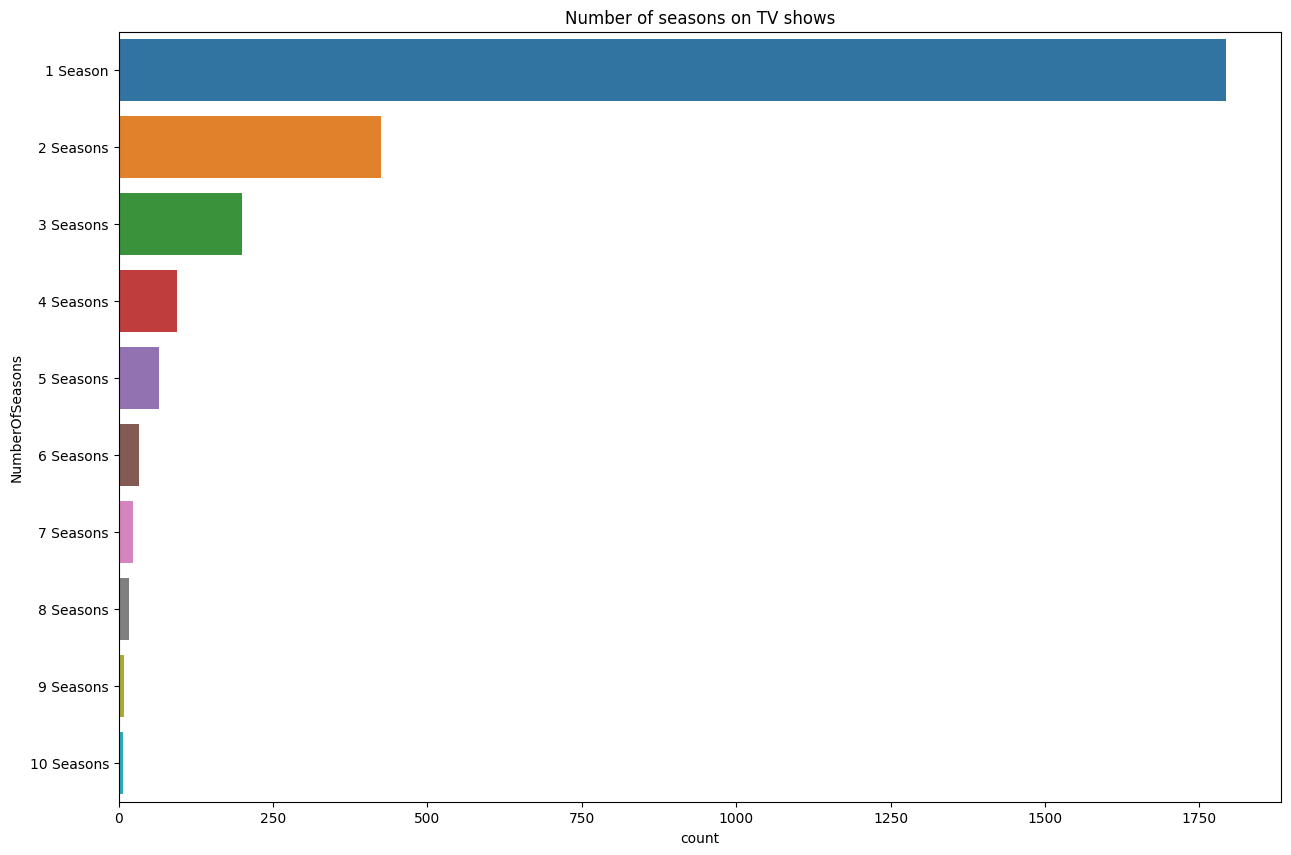

In [82]:
df_tv = df1.loc[df1['duration'].str.contains('Season')==True,'duration'].value_counts().reset_index()[:10]
df_tv.rename(columns={'index':'NumberOfSeasons','duration':'count'},inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(y='NumberOfSeasons',x='count',data=df_tv)
plt.title('Number of seasons on TV shows')
plt.show()

 - **Most number of TV shows are only one Season**

In [104]:
df_tv['NumberOfseasons']=df_tv.NumberOfSeasons.str.extract('(\d+)')
df_tv.drop('NumberOfSeasons',axis=1,inplace=True)
fc = df_tv.pop('NumberOfseasons')
df_tv.insert(0,'NumberOfseasons',fc)
df_tv

,NumberOfseasons,count
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65
5,6,33
6,7,23
7,8,17
8,9,9
9,10,7


 - **TV shows with only one seasons are the highest**
 - **Most successful TV shows with 10 seasons are only 7 TV shows**

## **Bivariate Analysis**

In [121]:
df_dt = df1
df_dt['year_added'] = df1.date_added.dt.year
df_dt['month_added'] = df1.date_added.dt.month_name()
df_dt['day_added'] = df1.date_added.dt.day_name()
df_dt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,November,Wednesday
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,November,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,January,Saturday


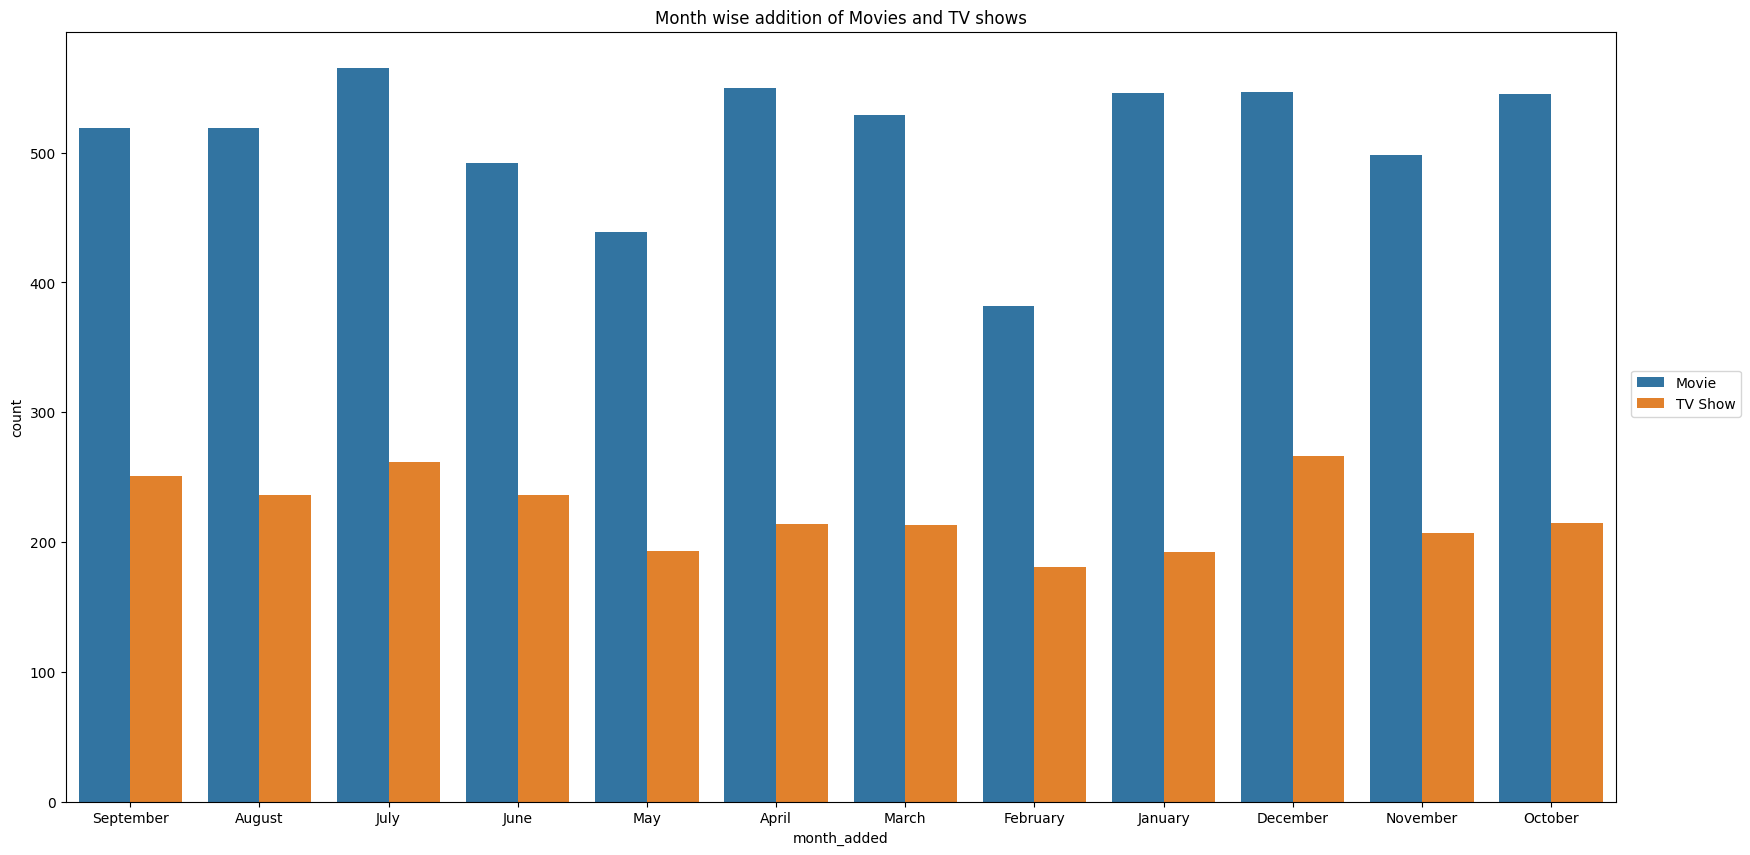

In [115]:
plt.figure(figsize=(20,10))
sns.countplot(x='month_added',data=df_dt,hue='type')
plt.title('Month wise addition of Movies and TV shows')
plt.legend(loc=(1.01,0.5))
plt.show()

 - **Based on above plot, July is the most content added month, followed by April**
 - **Least number of contents added months are Februrary and May**

In [152]:
# year_added column -> during which year the show was added on netflix
df1 = pd.DataFrame(df)
df_dt['year_added'] = pd.DatetimeIndex(df1.date_added).year
df_dt.year_added = df_dt.Year.astype('Int64')

In [174]:
# adding most added year '2019' for NaN values
df_dt.isna().sum()
df_dt.year_added.fillna(df_dt.year_added.value_counts().index[0],inplace=True)
df_dt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,2020


 - **Adding year with NaN values with most number of year the contents were added**

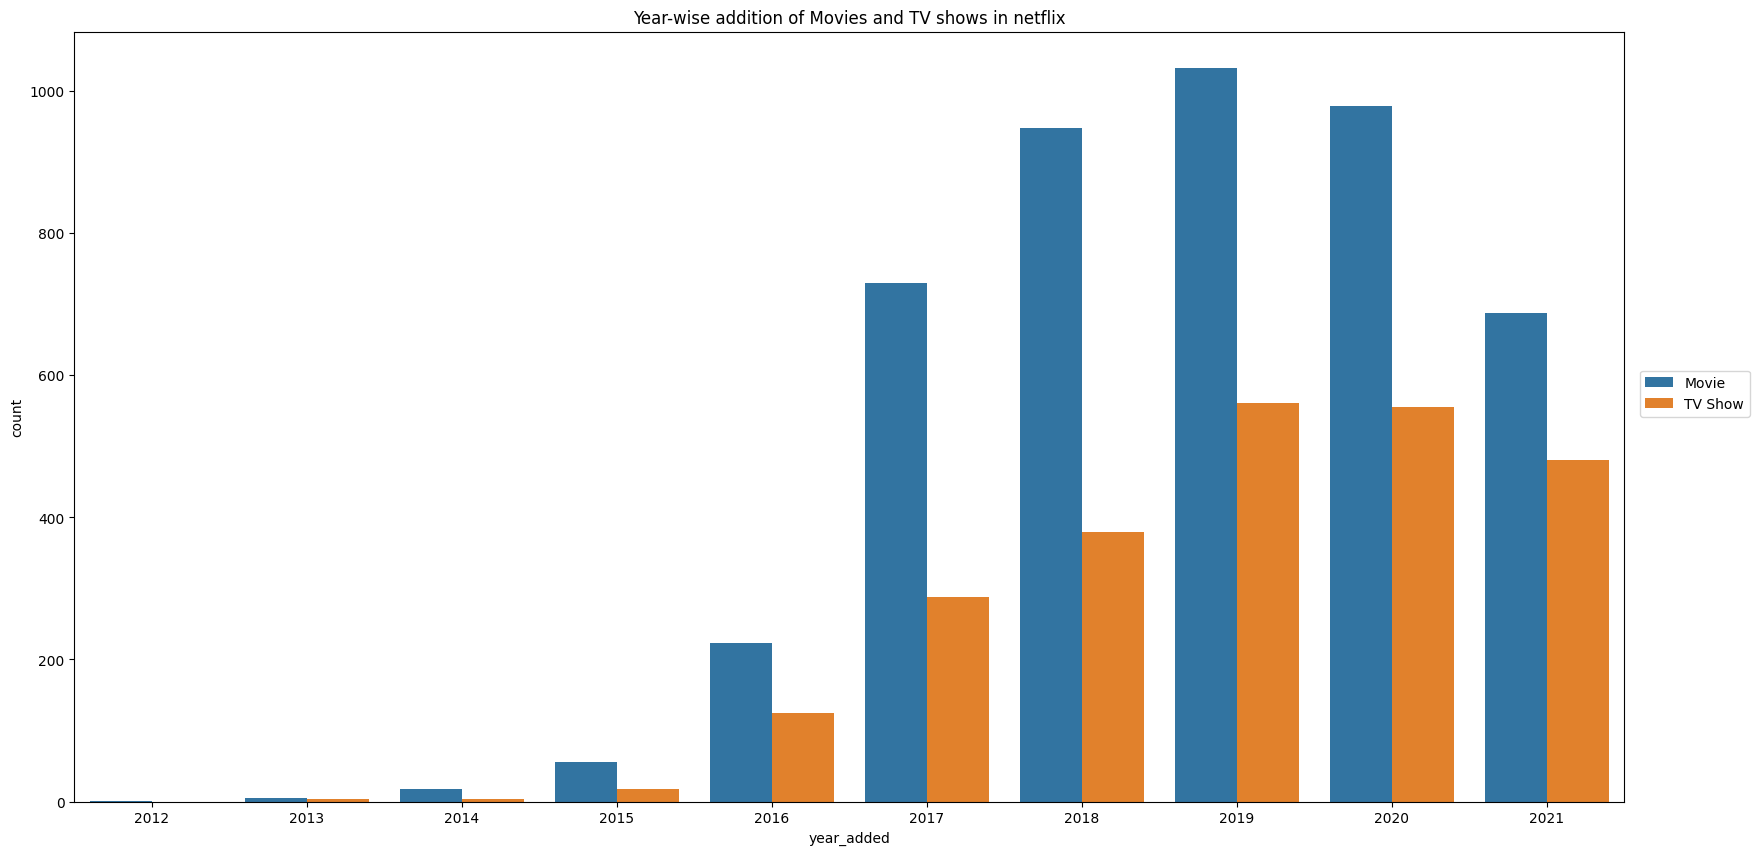

In [179]:
# Most shows added year on netflix between movies and TV shows
plt.figure(figsize=(20,10))
sns.countplot(x='year_added',data=df_year,hue='type')
plt.title('Year-wise addition of Movies and TV shows in netflix')
plt.legend(loc=(1.01,0.5))
plt.show()

 - Most contents were added during year 2019

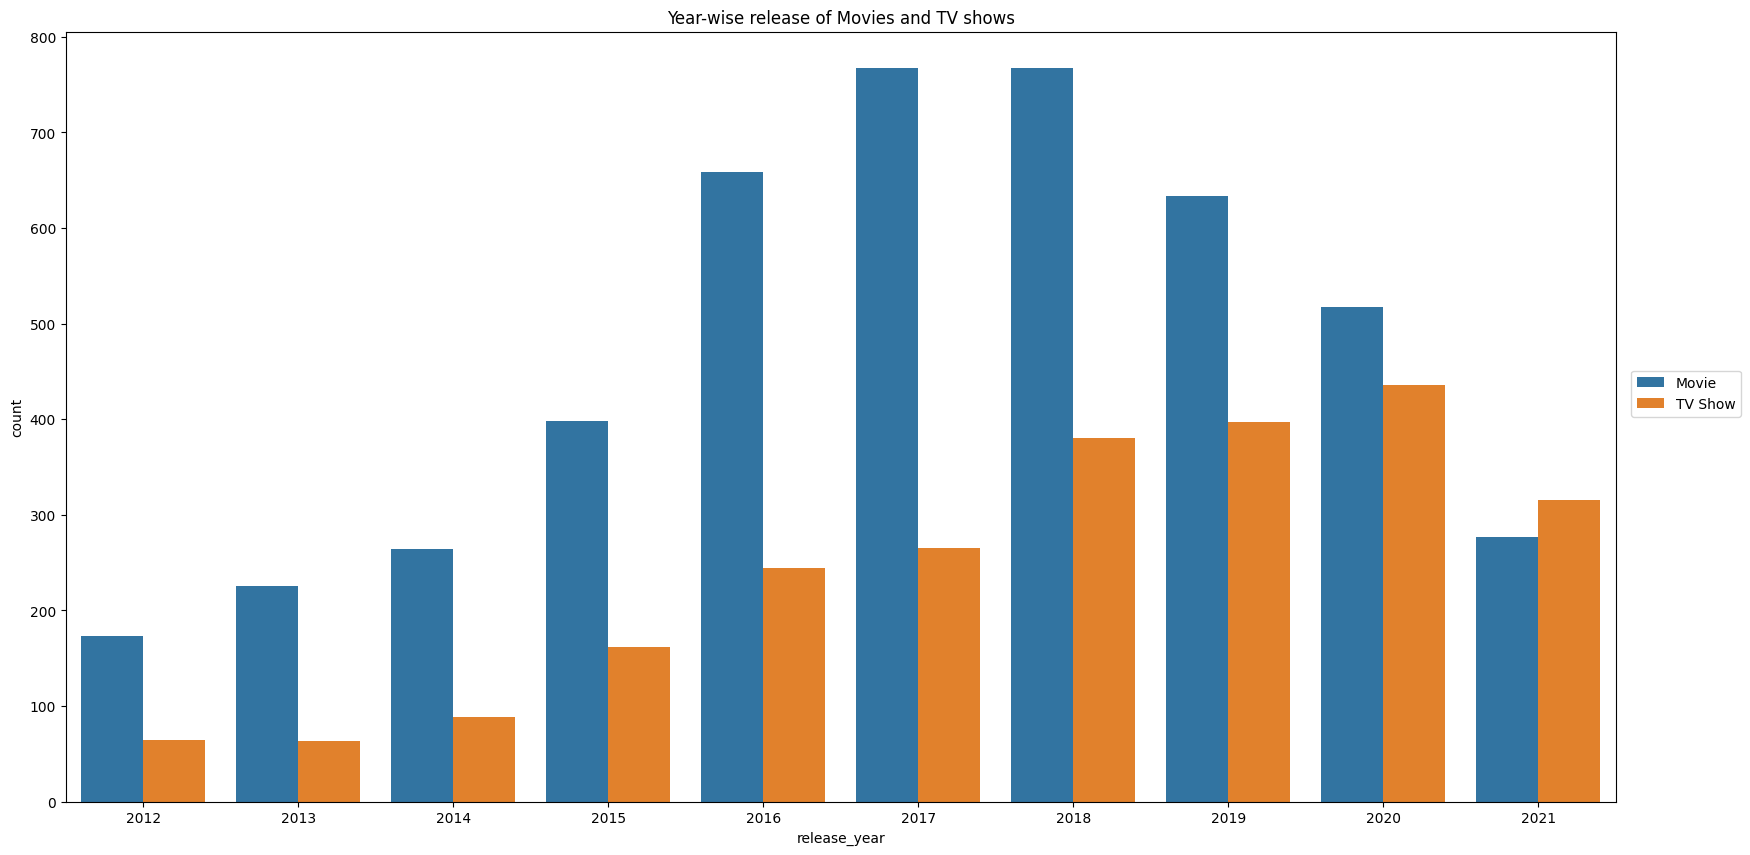

In [178]:
# Release difference between movies and TV shows for past 10 year window
plt.figure(figsize=(20,10))
df_year = df_dt.loc[df_dt['release_year']>2011]
sns.countplot(x='release_year',data=df_year,hue='type')
plt.title('Year-wise release of Movies and TV shows')
plt.legend(loc=(1.01,0.5))
plt.show()

 - **Most number of Movies and TV shows were released during year 2018 and 2020 respectively**

In [182]:
df_dt.rating.isnull().sum() # 4 null values in rating column

4

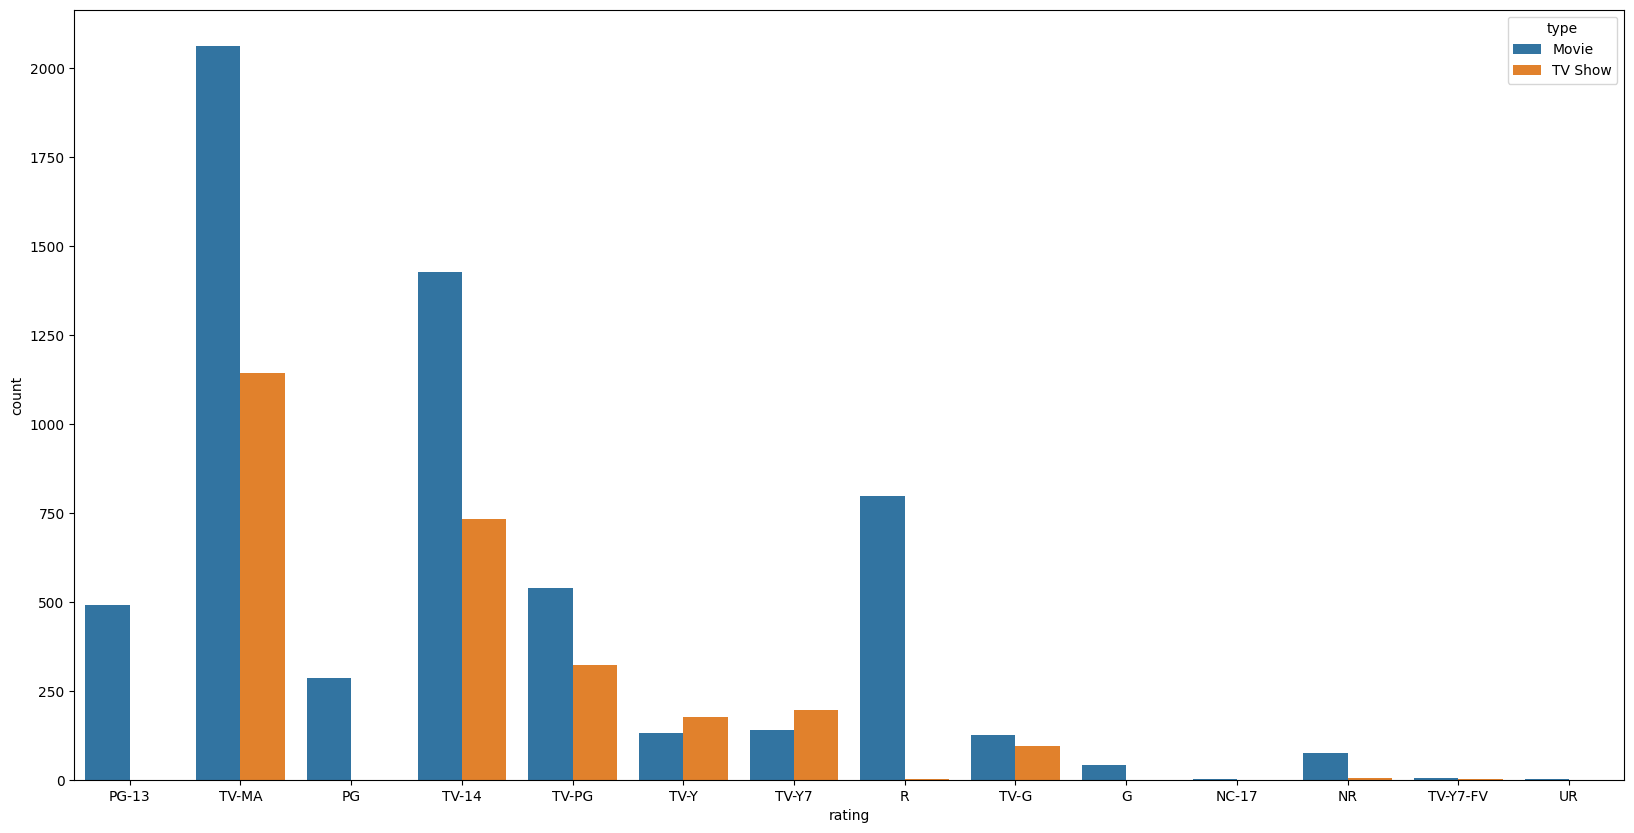

In [194]:
# Rating wise barchart for netflix
rating_list = ['PG-13','TV-MA','PG','TV-14','TV-PG','TV-Y','TV-Y7','R','TV-G','G','NC-17','NR','TV-Y7-FV','UR']
df_rating = df_dt[(df_dt.rating.isnull()==False) & (df.rating.apply(lambda x: x in rating_list))]
plt.figure(figsize=(20,10))
sns.countplot(x='rating',data=df_rating,hue='type')
plt.show()

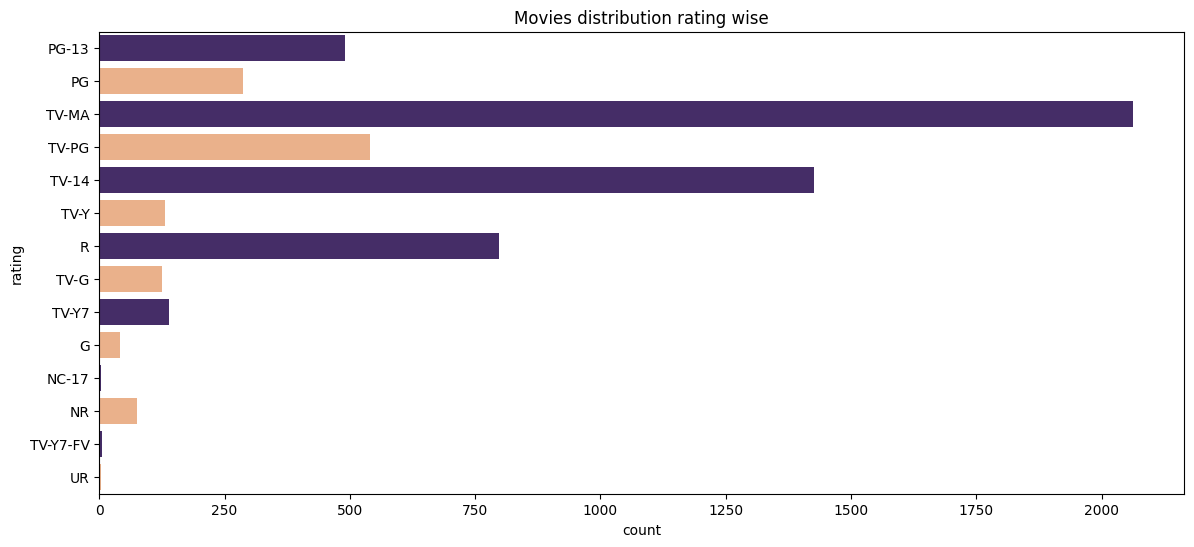

In [279]:
# countplot for Distributed Movie ratings
plt.figure(figsize=(14,6))
movies_ratingwise = df.loc[(df["type"] == "Movie") & (df.rating.apply(lambda x: x in rating_list)) , ["type" , "rating"]]
sns.countplot( y="rating" , data =movies_ratingwise,  palette=['#432371',"#FAAE7B"] )
plt.title("Movies distribution rating wise")
plt.show()

 - **Most movies are Rated TV-MA & TV-14**

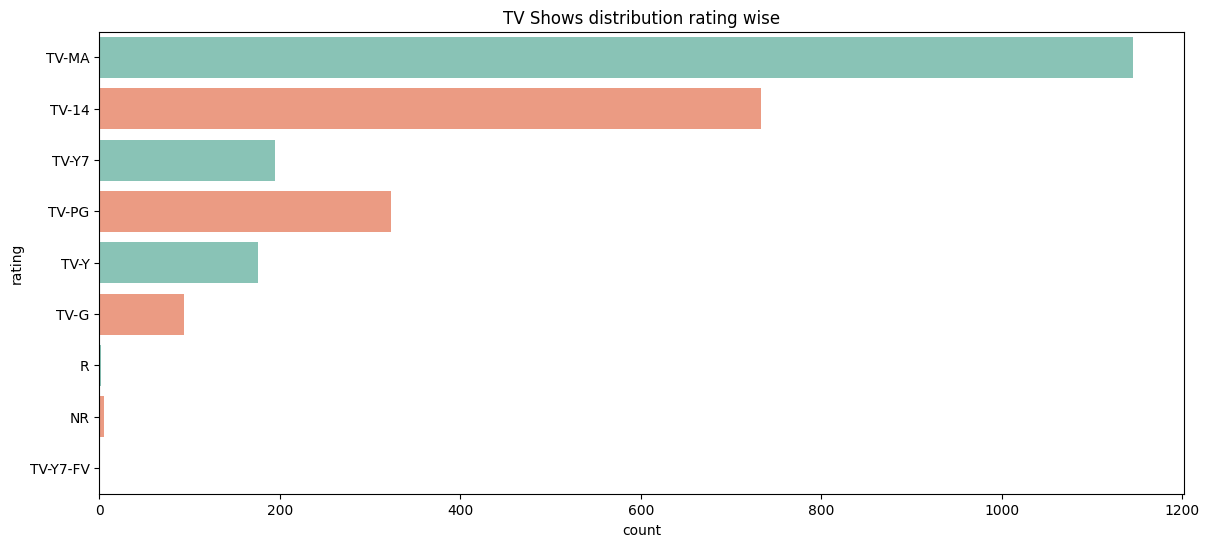

In [280]:
# countplot for Distributed TV Show ratings
plt.figure(figsize=(14,6))
tvshow_rating = df.loc[df["type"] == "TV Show" , ["type" , "rating"]]
sns.countplot( y="rating" , data =tvshow_rating,  palette=['#7fcdbb',"#fc9272"] )
plt.title("TV Shows distribution rating wise")
plt.show()

 - **Most TV shows are rated TV-MA**

In [284]:
# exploding nested country column similarly
country = df["country"].apply(lambda x: str(x).split(", ")).tolist() #exploding the country column
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10845 non-null  object
 1   country  10845 non-null  object
dtypes: object(2)
memory usage: 169.6+ KB


In [285]:
df_country.head(4)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan


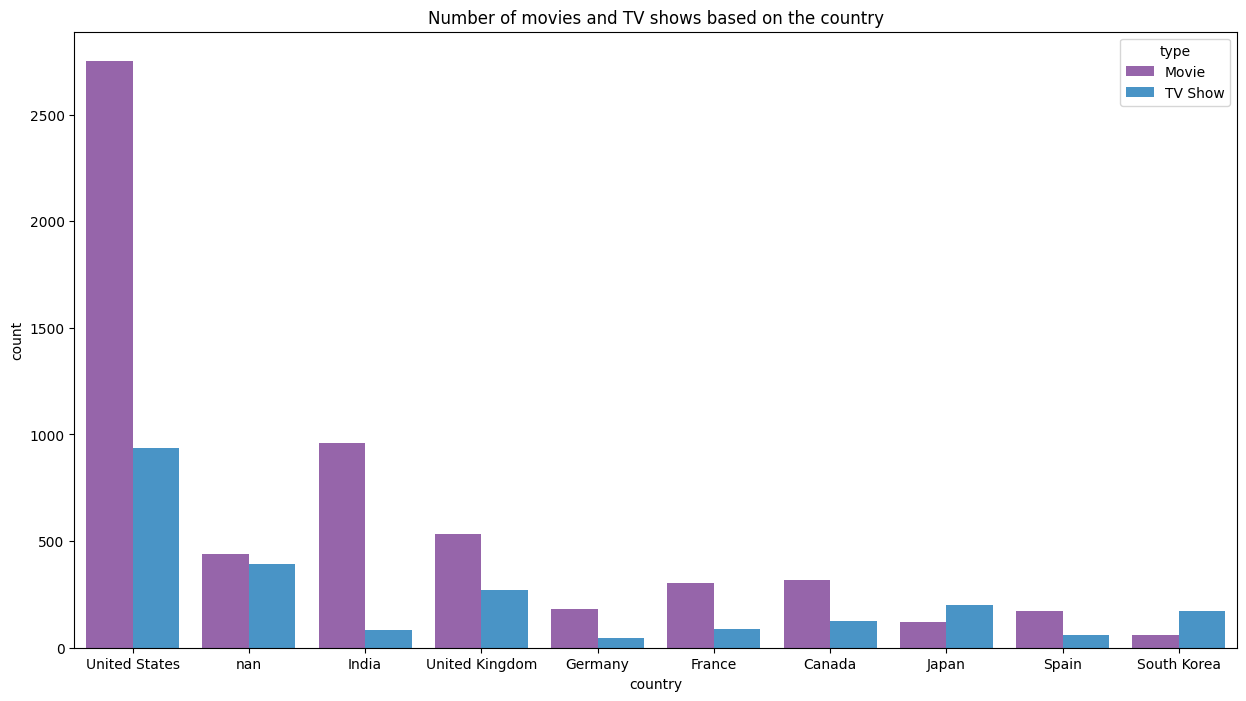

In [287]:
Country_wise_trend = df.merge(df_country , on = "title")
Country_wise_trend.drop(columns = "country_x" , inplace = True)
Country_wise_trend.rename(columns = {"country_y" : "country"}, inplace = True)
Country_wise_trend = Country_wise_trend.loc[Country_wise_trend["country"] != "Unknown"]
top10_country = Country_wise_trend["country"].value_counts().head(10).reset_index()
top10_country.rename(columns = {"index" :"country" , "country" : "count"}, inplace = True)
Country_wise_trend = Country_wise_trend.merge(top10_country, how = "inner" , on = "country")
plt.figure(figsize = (15,8))
sns.countplot(x ="country" , data =Country_wise_trend , hue = "type", palette=["#9b59b6","#3498db"] )
plt.title("Number of movies and TV shows based on the country")
plt.show()

 - **US has the highest list of movies and TV shows**
 - **India and UK has the second and third highest number of contents in netflix**

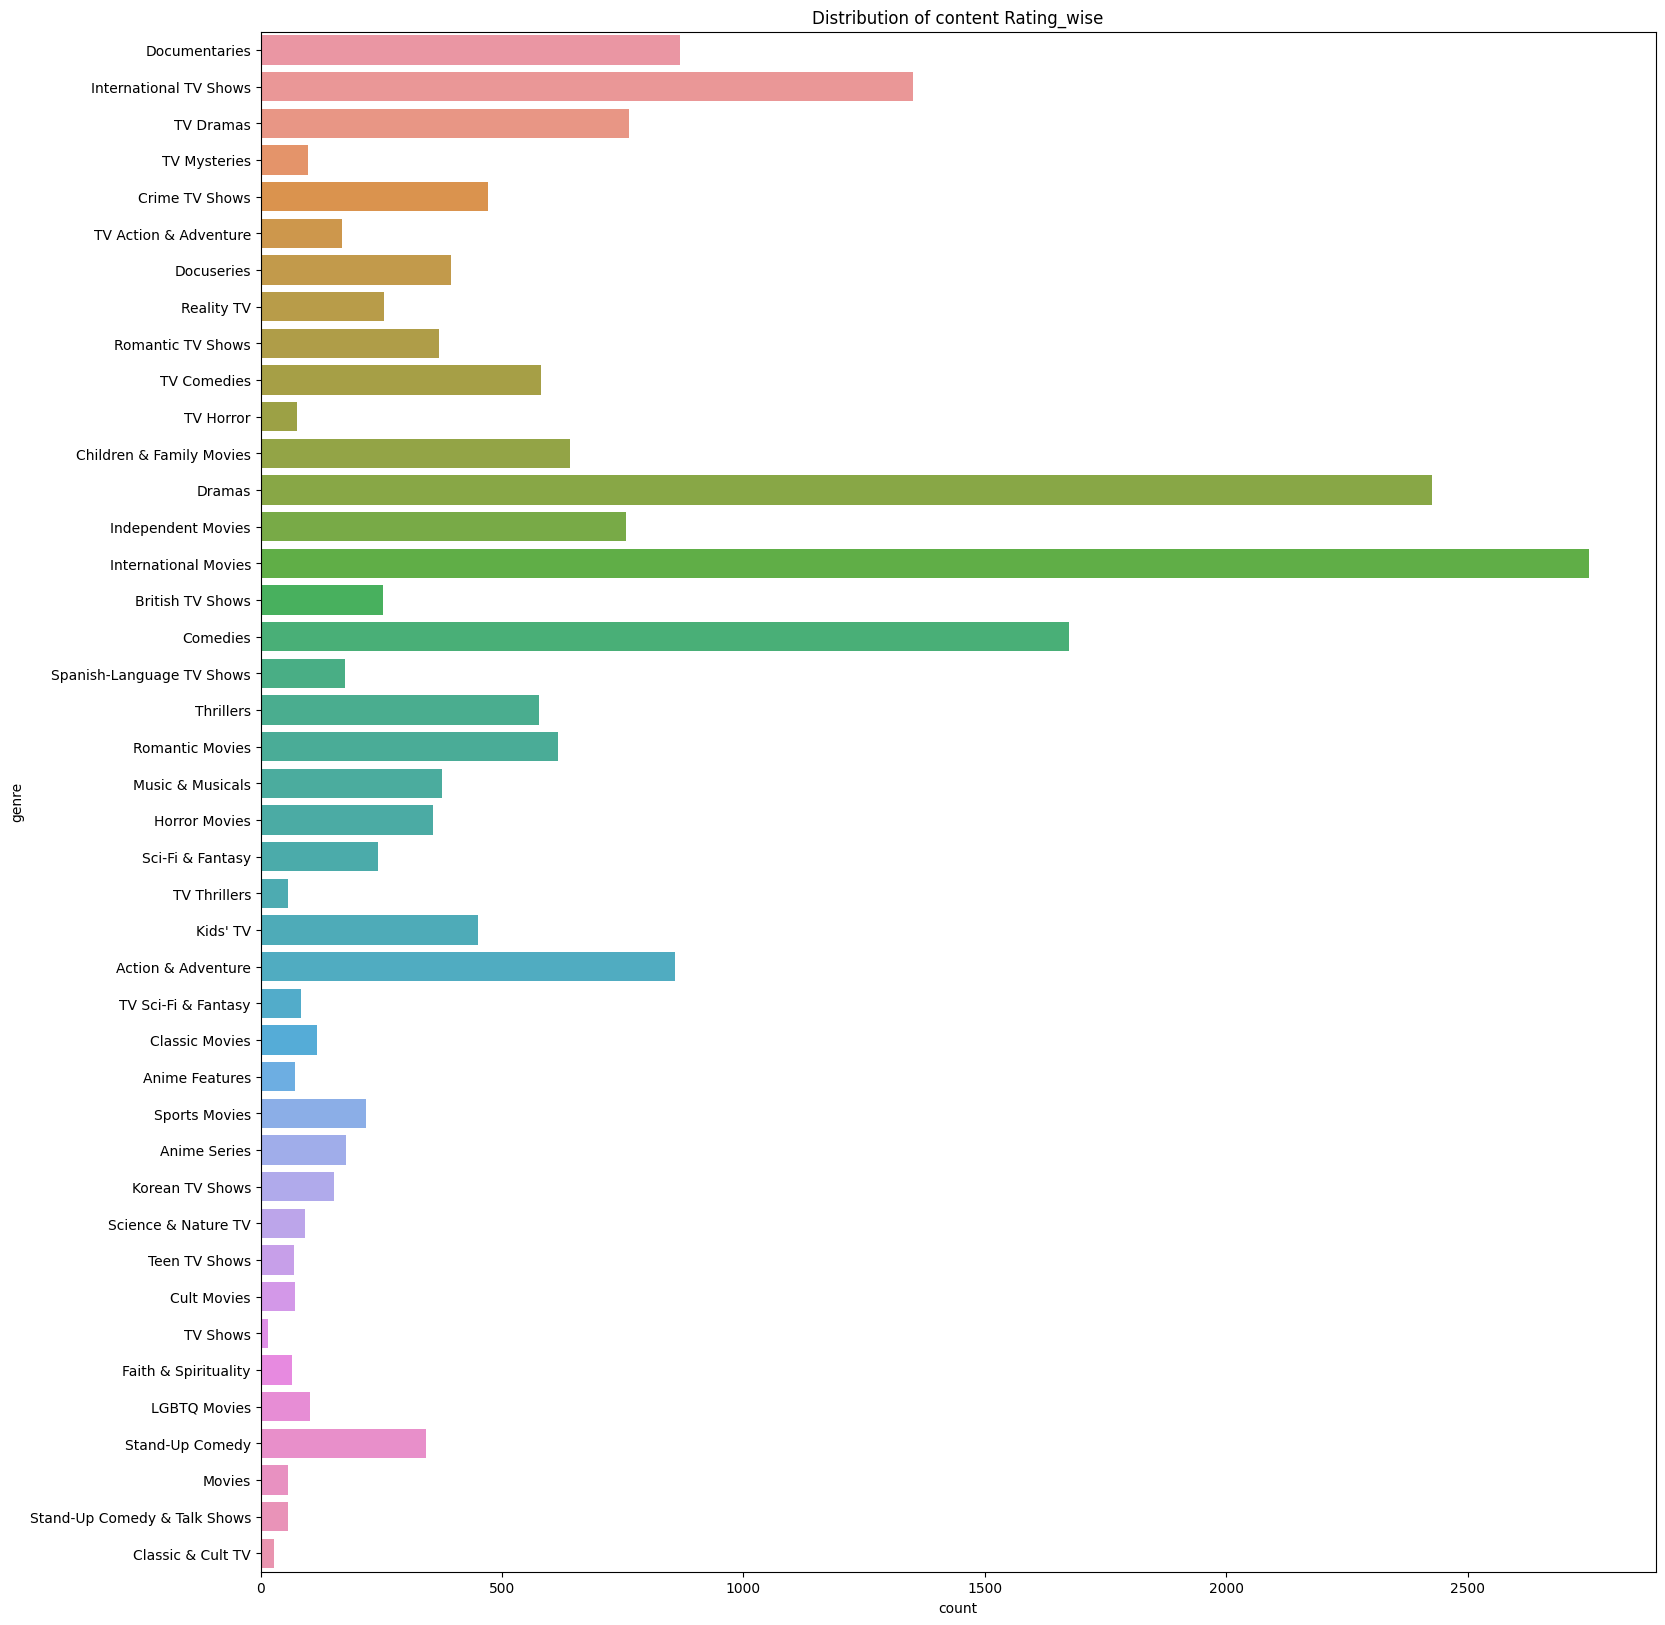

In [452]:
# Exploding genre Column
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]
plt.figure(figsize = (18,20))
sns.countplot(y = "genre" , data =df_genre )
plt.title("Distribution of content Rating_wise")
plt.show()

Most appearing category in netflix movies and TV shows are:-

 - International Movies
 - Dramas
 - Comedies
 - International TV show

### Categorical Variables: Box Plot

<Axes: title={'center': 'Duration for Movies'}>

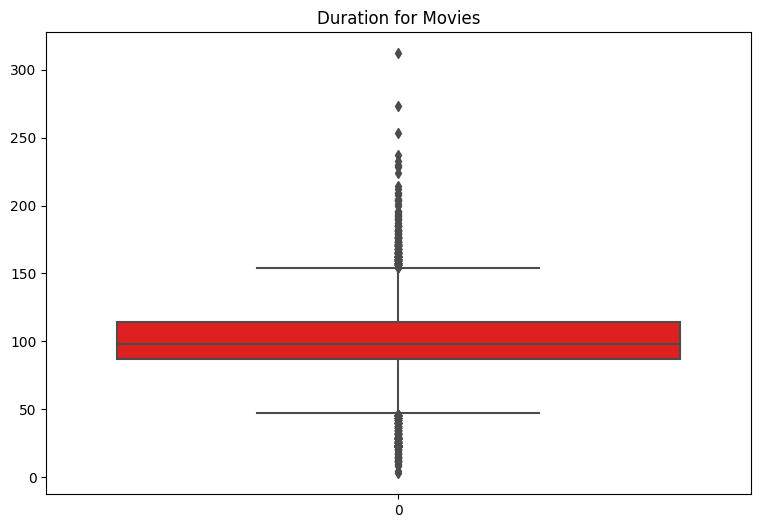

In [320]:
# Boxplot for duration of Movie
df = pd.read_csv('netflix.csv')
plt.figure(figsize=(20,6))
duration_df = df.loc[df.duration.str.contains("min")== True]['duration'].apply(lambda x: x.split()[0]).astype('Int64')
plt.subplot(1,2,1)
plt.title('Duration for Movies')
sns.boxplot(duration_df , color = "red")

 - **Average duration of movies are around 100 min**

### HeatMap for Trend Analysis

In [392]:
# expanding country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist()
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]

In [393]:
df_trend_country = df.merge(df_country , on = "title")
df_trend_country.drop(columns = "country_x" , inplace = True)
df_trend_country.rename(columns = {"country_y":"country"}, inplace = True)

In [394]:
temp = df_trend_country['country'].value_counts()[:11].reset_index()
temp.rename(columns = {'index':'country', 'country':'count'}, inplace=True)
country_list = temp['country'].tolist()
df_top10country = df_trend_country.loc[df_trend_country['country'].isin(country_list)]
df_top10country = df_top10country.loc[df_top10country["country"]!="Unknown"]

In [396]:
heat_rating = df_top10country.groupby("country")["rating"].value_counts().reset_index(name='level_1')
heat_rating = heat_rating.pivot("country" , "level_1" , "rating")
plt.figure(figsize = (20,8))
sns.heatmap(heat_rating, annot = True,  cmap="Blues", fmt = "d")
plt.title("Ditribution of content availble in differnt countires rating wise")
plt.show()

<img src="heatmap.png" alt="Alternative text" />

 - Top 10 countries are having most content that belongs to TV-MA (Adults Category)
 - India and United States are having large content in TV-14 category.
 - United Kingdom and United States are having large content in R category.

## 5. Missing Value & Outlier check
#### **Unnesting of data for Actor, Director, Country**

In [203]:
# Dropping NaN Values
df = pd.read_csv('netflix.csv')
df1 = df.dropna(subset=['rating'])
df1 = df1.dropna(subset=['duration'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


In [204]:
# filtering indices that has Null values all at once in country,cast, director columns
null_df = df1[['country','cast','director']].isna()
null_df = null_df[ (null_df['country']==True) & (null_df['cast']==True) & (null_df['director']==True) ]
index_to_drop = null_df.index
index_to_drop

Int64Index([   3,   10,   14,   74,  123,  147,  181,  218,  224,  234,  242,
             320,  368,  369,  379,  404,  430,  465,  466,  490,  497,  549,
             641,  653,  710,  738,  761,  842,  851,  852,  854,  925,  936,
             957, 1005, 1038, 1056, 1094, 1095, 1116, 1224, 1225, 1723, 1828,
            1889, 1890, 1952, 2101, 2152, 2222, 2236, 2335, 2394, 2425, 2432,
            2495, 2568, 2569, 2699, 2893, 2982, 3393, 3394, 3395, 3396, 3397,
            3469, 3539, 3592, 3789, 3837, 3953, 3987, 4015, 4056, 4199, 4250,
            4372, 4627, 4637, 4654, 5291, 5799, 5870, 6389, 6618, 7017, 7222,
            7438, 7483, 7624, 7812, 8109, 8199, 8609, 8803],
           dtype='int64')

In [205]:
# droping indices that was filtered indices, around 103 rows have been removed
df1 = df1.drop(index=index_to_drop)
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### **Imputation**

In [206]:
# using above cleaned data, to add the added date and verifying the sum of null values in the column
df1["date_added"] = df1["date_added"].fillna(df1["release_year"])
df1["date_added"].isna().sum()

0

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


### **Imputation for directors**

In [209]:
director_fill = df1.groupby(['type',"listed_in","country"])['director'].apply(lambda x: x.mode())
director_fill = director_fill.reset_index()
director_fill

,type,listed_in,country,level_3,director
0,Movie,Action & Adventure,"Australia, United States",0,Simon Wincer
1,Movie,Action & Adventure,"Bulgaria, United States",0,Todor Chapkanov
2,Movie,Action & Adventure,Canada,0,Adam Alleca
3,Movie,Action & Adventure,Canada,1,Allan Ungar
4,Movie,Action & Adventure,Canada,2,Brett Donowho
...,...,...,...,...,...
3195,TV Show,TV Shows,Japan,0,"Kobun Shizuno, Hiroyuki Seshita"
3196,TV Show,TV Shows,Saudi Arabia,0,"Ali Kalthami, Meshal Aljaser, Faris Godus, Moh..."
3197,TV Show,TV Shows,United States,0,"Joe Berlinger, Bruce Sinofsky"
3198,TV Show,TV Shows,United States,1,"Oscar Micheaux, Spencer Williams, Richard E. N..."


In [210]:
df1 = df1.merge(director_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["director"] = np.where(df1["director_x"].isna(), df1["director_y"], df1["director_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(director_fill[['type',"listed_in","director"]], on = ["type","listed_in"] , how = 'left')
df2["director"] = np.where(df2["director_x"].isna(), df2["director_y"], df2["director_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(director_fill[['type',"director"]], on = ["type"] , how = 'left')
df3["director"] = np.where(df3["director_x"].isna(), df3["director_y"], df3["director_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 18958929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [211]:
df3['director'].isna().sum() #no Nan values in Directors column

0

### **Imputation for Cast**

In [212]:
cast_fill = df1.groupby(['type',"listed_in","country"])['cast'].apply(lambda x: x.mode())
cast_fill = cast_fill.reset_index()
cast_fill

,type,listed_in,country,level_3,cast
0,Movie,Action & Adventure,"Australia, United States",0,"Tom Selleck, Laura San Giacomo, Alan Rickman, ..."
1,Movie,Action & Adventure,"Bulgaria, United States",0,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb..."
2,Movie,Action & Adventure,Canada,0,"Cole Hauser, Bruce Willis, Shawn Ashmore, Asht..."
3,Movie,Action & Adventure,Canada,1,"Dominic Purcell, Cody Hackman, Stephen Lang, T..."
4,Movie,Action & Adventure,Canada,2,"Jason Momoa, Garret Dillahunt, Jill Wagner, St..."
...,...,...,...,...,...
6470,TV Show,TV Shows,India,0,"Rahman, Havish, Regina Cassandra, Nandita Swet..."
6471,TV Show,TV Shows,India,1,"Suriya, Vijay Sethupathi, Revathy, Prakash Raj..."
6472,TV Show,TV Shows,Japan,0,"Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa..."
6473,TV Show,TV Shows,Saudi Arabia,0,"Moayad Alnefaie, Mohammed Alhamdan, Citi Bet B..."


In [216]:
# similar type of imputation for cast as did in directors
df1 = df1.merge(cast_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["cast"] = np.where(df1["cast_x"].isna(), df1["cast_y"], df1["cast_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(cast_fill[['type',"listed_in","cast"]], on = ["type","listed_in"] , how = 'left')
df2["cast"] = np.where(df2["cast_x"].isna(), df2["cast_y"], df2["cast_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(cast_fill[['type',"cast"]], on = ["type"] , how = 'left')
df3["cast"] = np.where(df3["cast_x"].isna(), df3["cast_y"], df3["cast_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 33369933
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      7066 non-null   object
 4   cast          8704 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


### **Imputation for country**

In [224]:
country_fill = df1.groupby(["cast","director"])['country'].apply(lambda x: x.mode())
country_fill = country_fill.reset_index()
country_fill

,cast,director,level_2,country
0,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",Mike Gunther,0,United States
1,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",Michael D. Black,0,United States
2,A.R. Rahman,Rudradeep Bhattacharjee,0,India
3,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",Dharmesh Darshan,0,India
4,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",Hari Nath,0,India
...,...,...,...,...
6310,"Úrsula Corberó, Álvaro Cervantes, Najwa Nimri,...",Julio Medem,0,Spain
6311,"İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cen...",Bedran Güzel,0,Turkey
6312,"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre K...",Hakan Algül,0,Turkey
6313,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Neslihan Yesilyurt,0,Turkey


In [225]:
df1 = df1.merge(country_fill, on = ["cast","director"] , how = 'left')
df1["country"] = np.where(df1["country_x"].isna(), df1["country_y"], df1["country_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(country_fill[["country","cast"]], on = ["cast"] , how = 'left')
df2["country"] = np.where(df2["country_x"].isna(), df2["country_y"], df2["country_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )


df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 28104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      7066 non-null   object
 4   cast          8464 non-null   object
 5   country       8030 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [226]:
m = df['country'].mode()[0]
df2["country"] = df2['country'].fillna(m)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 28104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      7066 non-null   object
 4   cast          8464 non-null   object
 5   country       8704 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [228]:
df2['date_added'] = pd.to_datetime(df2['date_added'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 28104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8704 non-null   object        
 1   type          8704 non-null   object        
 2   title         8704 non-null   object        
 3   director      7066 non-null   object        
 4   cast          8464 non-null   object        
 5   country       8704 non-null   object        
 6   date_added    8704 non-null   datetime64[ns]
 7   release_year  8704 non-null   int64         
 8   rating        8704 non-null   object        
 9   duration      8704 non-null   object        
 10  listed_in     8704 non-null   object        
 11  description   8704 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 884.0+ KB


In [229]:
df2 = df2.reset_index(drop=True)
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8699,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8700,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8701,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8702,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Histogram for Univariate Analysis

In [232]:
# After imputation/cleaning data from NaN values are completed
# Now Movies released after 1990 is filtered
released_movies = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "Movie")  ]['release_year']
released_movies

0       2020
5       2021
6       1993
8       2021
10      2021
        ... 
8699    2015
8700    2007
8701    2009
8702    2006
8703    2015
Name: release_year, Length: 5855, dtype: int64

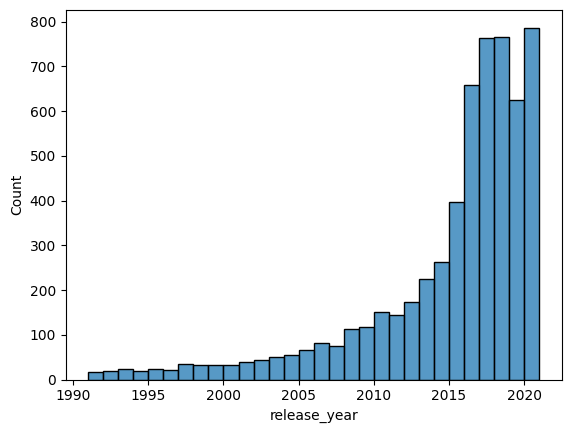

In [233]:
# After filtering released Movies count is represented in histogram
sns.histplot(data=released_movies , bins=30 , )
plt.show()

 - **Most number of movies are released during 2020**

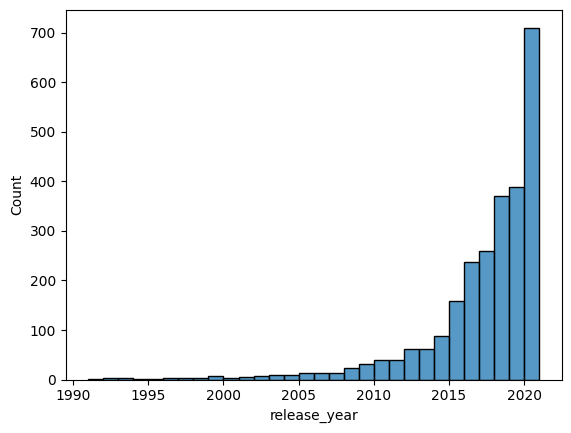

In [234]:
# Similarly filtering and returning histogram for TV shows released after 1990
released_tv = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "TV Show")  ]['release_year']
sns.histplot(data=released_tv , bins=30 , )
plt.show()

 - **There is sharp rise of TV shows released in 2020**

### Insights based on Non-Graphical and Visual Analysis

In [413]:
# creating country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist()
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]
df_country = df_country.loc[df_country.country!='nan']
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
4,Kota Factory,India
7,Sankofa,United States
8,Sankofa,Ghana
...,...,...
10839,Zinzana,Jordan
10840,Zodiac,United States
10842,Zombieland,United States
10843,Zoom,United States


In [414]:
# expanding nested directors column
director = df["director"].apply(lambda x : str(x).split(", ")).tolist()
df_director = pd.DataFrame(director, index = df["title"])
df_director= df_director.stack()
df_director = df_director.reset_index()
df_director.drop(columns ="level_1" , inplace = True)
df_director.columns = ["title" , "director"]
df_fav_director = df.merge(df_director , on = "title" )
df_fav_director

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",nan
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",nan
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",David Fincher
9608,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",nan
9609,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Ruben Fleischer
9610,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Peter Hewitt


In [435]:
#merging favorite director and filter country data
director_countrywise= df_fav_director.merge(df_country , on = "title")
director_countrywise= director_countrywise.drop(columns = ["director_x" , "country_x" ])
director_countrywise.rename(columns = {"director_y": "director" , "country_y" : "country"}, inplace = True)
director_countrywise = director_countrywise.loc[director_countrywise["director"] != "Unknown"]
director_countrywise.reset_index(inplace= True)
director_countrywise.head()

,index,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description,director,country
0,0,s1,Movie,Dick Johnson Is Dead,NaN,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,United States
3,3,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Haile Gerima,United States
4,4,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Haile Gerima,Ghana
5,5,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Haile Gerima,Burkina Faso
6,6,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Haile Gerima,United Kingdom


In [437]:
country = director_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Directors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'**{val}**')
    print(director_countrywise.loc[director_countrywise['country']==val, 'director'].value_counts()[:2])
    print('\n')

 Top 2 Directors of Top 5 Countries


**United States**
Jay Karas       15
Marcus Raboy    15
Name: director, dtype: int64


**India**
Anurag Kashyap    9
David Dhawan      9
Name: director, dtype: int64


**United Kingdom**
Alastair Fothergill    4
Edward Cotterill       4
Name: director, dtype: int64


**Canada**
Justin G. Dyck      8
Mike Clattenburg    5
Name: director, dtype: int64


**France**
Thierry Donard     5
Youssef Chahine    4
Name: director, dtype: int64


**Spain**
Fernando González Molina    4
Hernán Zin                  4
Name: director, dtype: int64




 - **Anurag Kashyap and David Dhawan are the most famous directors for Inida.**
 - **Jay Karas and Marcus Raboy are the most famous directors in United States.**

In [438]:
director_countrywise["director"].value_counts().head(3)

Jan Suter          21
Raúl Campos        19
Martin Scorsese    18
Name: director, dtype: int64

 - **Jan Suter has worked for the highest number of movies**

In [440]:
# unnesting cast column
cast = df["cast"].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast,  index = df["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns = "level_1" , inplace = True)
df_cast.columns = ["title" , "cast"]
df_fav_cast = df.merge(df_cast , on = "title" )

In [445]:
cast_countrywise= df_fav_cast.merge(df_country , on = "title")
cast_countrywise= cast_countrywise.drop(columns = ["cast_x" , "country_x"])
cast_countrywise = cast_countrywise.rename(columns = {"cast_y" : "cast" , "country_y" : "country"})
cast_countrywise = cast_countrywise.loc[cast_countrywise["cast"] != "Unknown"].reset_index() 
cast_countrywise.head()

,index,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,cast,country
1,1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
2,2,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa
3,3,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,South Africa
4,4,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,South Africa
5,5,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Dillon Windvogel,South Africa


In [446]:
country_actor = cast_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Actors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'--{val}--')
    print(cast_countrywise.loc[cast_countrywise['country']==val, 'cast'].value_counts()[:2])
    print('\n')

 Top 2 Actors of Top 5 Countries


--United States--
Tara Strong          22
Samuel L. Jackson    22
Name: cast, dtype: int64


--India--
Anupam Kher       40
Shah Rukh Khan    34
Name: cast, dtype: int64


--United Kingdom--
David Attenborough    17
John Cleese           16
Name: cast, dtype: int64


--Canada--
John Paul Tremblay    14
Robb Wells            14
Name: cast, dtype: int64


--France--
Wille Lindberg    5
Benoît Magimel    5
Name: cast, dtype: int64


--Spain--
Mario Casas    10
Luis Tosar      9
Name: cast, dtype: int64




 - **Anupam Kher and Shah Rukh Khan are the top actors in India**
 - **Tara Strong and Samuel L. Jackson are top actors in US**

In [447]:
# Top 5 Actors
cast_countrywise["cast"].value_counts().head(5)

Anupam Kher           46
David Attenborough    45
Tara Strong           39
John Cleese           39
Shah Rukh Khan        37
Name: cast, dtype: int64

 - **These are the top 5 most famous actors**

### Insights

(Few Insights are added inline)

 - Netflix added more movies as compare to TV shows
 - Content for United States on netflix is maximum as compare to other countries.
 - Netflix content is mostly availabe for adults only
 - Most popular genres in recent years are International movies, Dramas, Comedies, International TV Shows and Action & Adventure.

**For Movies**


 - In United States , India and United kingdom movies are more popular as comapre to other countires
 - Almost same no. of movies are added on netflix every month.
 - Mostly movies are of "100 min" duration.

**For TV Shows**


 - TV Shows mostly are having season 1 and season 2 respectively.
 - Most of the TV shows are TV-MA

### Recommendations

**Movies**


 - Preferd movies duration is between 90-100 minutes.
 - Netflix should add more movies for United States and India falling in category of Internation movies and comedies
 - Netflix should add more movies for United States and India having rating of TV-MA & TV-14.
 - Top three countries where movies added are United States, India & United Kingdom.
 - Netflix shoud add TV Show on Friday than any other weekday.


**TV Shows**


 - Sum of TV shows that has seasons more than 7 are 33, Netflix must add more successful TV shows with atleast over 7 seasons
 - Preferd movies duration is 1-2 seeasons.
 - Netflix should focus on countries like Japan, South Korea and France in TV shows , as they prefer TV shows over movies.
 - Netflix shoud add TV Show on Friday than other weekday.
 - As per 2021 data, count of TV showes are more than movies , this means people wants more web-series as they have for leisure time may be due to work from home scenario.